In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#scaling, encoding
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from scipy.stats import chi2_contingency,kruskal 

#model building
import scipy.stats as stats
import statsmodels.api as sma

#train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV

#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
#performance matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score,roc_curve

#when imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df= pd.read_csv(r'C:\Users\HP\Desktop\capstone searching\timings.csv')
df.head(2)

,Unnamed: 0.1,Unnamed: 0,sno,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,coordinates,timings,online_order,table_reservation,delivery_only,famous_food
0,0,0,0,https://www.zomato.com/ncr/sainik-food-pandav-...,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21,011 22486474 +91 9717806814,North Indian,300,"C 4/1, Opposite Mother Dairy, Pandav Nagar, Ne...","28.6177324058,77.2848711535","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",False,False,False,NaN
1,1,1,1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500,"Shop 14, Trishul Shivdham Complex, Shiv Mandir...","19.2058869331,73.1842865422","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...",False,False,False,Penne Pasta


In [3]:
df.shape

(224520, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224520 entries, 0 to 224519
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0.1       224520 non-null  int64 
 1   Unnamed: 0         224520 non-null  int64 
 2   sno                224520 non-null  int64 
 3   zomato_url         224520 non-null  object
 4   name               224520 non-null  object
 5   city               224520 non-null  object
 6   area               224520 non-null  object
 7   rating             224520 non-null  object
 8   rating_count       224520 non-null  int64 
 9   telephone          224520 non-null  object
 10  cusine             224520 non-null  object
 11  cost_for_two       224520 non-null  int64 
 12  address            222735 non-null  object
 13  coordinates        224520 non-null  object
 14  timings            221556 non-null  object
 15  online_order       224520 non-null  bool  
 16  table_reservation  2

In [5]:
df.nunique()

Unnamed: 0.1         224520
Unnamed: 0           157039
sno                  136397
zomato_url           224520
name                 146659
city                     83
area                   2501
rating                   38
rating_count           2773
telephone            190233
cusine                19683
cost_for_two            179
address              204381
coordinates          202955
timings               14724
online_order              2
table_reservation         2
delivery_only             2
famous_food           46050
dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
sno                       0
zomato_url                0
name                      0
city                      0
area                      0
rating                    0
rating_count              0
telephone                 0
cusine                    0
cost_for_two              0
address                1785
coordinates               0
timings                2964
online_order              0
table_reservation         0
delivery_only             0
famous_food          171994
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

Unnamed: 0.1          0.000000
Unnamed: 0            0.000000
sno                   0.000000
zomato_url            0.000000
name                  0.000000
city                  0.000000
area                  0.000000
rating                0.000000
rating_count          0.000000
telephone             0.000000
cusine                0.000000
cost_for_two          0.000000
address               0.795029
coordinates           0.000000
timings               1.320150
online_order          0.000000
table_reservation     0.000000
delivery_only         0.000000
famous_food          76.605202
dtype: float64

In [8]:
#numerical statistical analysis
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,224520.0,112259.500000,64813.485557,0.0,56129.75,112259.5,168389.25,224519.0
Unnamed: 0,224520.0,69557.830790,42104.190033,0.0,36324.00,64389.0,100908.25,157038.0
sno,224520.0,54980.064373,38031.686360,0.0,22988.75,51053.5,80266.25,136396.0
rating_count,224520.0,95.530893,345.963561,0.0,0.00,11.0,59.00,42621.0
cost_for_two,224520.0,418.454561,375.899996,0.0,200.00,300.0,500.00,30000.0


In [9]:
# categorical statistical analysis
df.describe(exclude=np.number).T

,count,unique,top,freq
zomato_url,224520,224520,https://www.zomato.com/ncr/sainik-food-pandav-...,1
name,224520,146659,Cafe Coffee Day,1165
city,224520,83,Delhi NCR,38699
area,224520,2501,Civil Lines,1425
rating,224520,38,0,52052
telephone,224520,190233,Not Available,8009
cusine,224520,19683,North Indian,20549
address,222735,204381,"Laxman Jhula, Tapovan, Rishikesh",38
coordinates,224520,202955,"0.0000000000,0.0000000000",12800
timings,221556,14724,"{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1...",36727


In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
sno                   int64
zomato_url           object
name                 object
city                 object
area                 object
rating               object
rating_count          int64
telephone            object
cusine               object
cost_for_two          int64
address              object
coordinates          object
timings              object
online_order           bool
table_reservation      bool
delivery_only          bool
famous_food          object
dtype: object

In [12]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'sno', 'zomato_url', 'name', 'city',
       'area', 'rating', 'rating_count', 'telephone', 'cusine', 'cost_for_two',
       'address', 'coordinates', 'timings', 'online_order',
       'table_reservation', 'delivery_only', 'famous_food'],
      dtype='object')

In [13]:
df.corr()

,Unnamed: 0.1,Unnamed: 0,sno,rating_count,cost_for_two,online_order,table_reservation,delivery_only
Unnamed: 0.1,1.000000,0.315891,0.113078,-0.038903,-0.073894,0.055038,-0.059104,0.038799
Unnamed: 0,0.315891,1.000000,0.501321,-0.095142,-0.088579,-0.048410,-0.063306,-0.131600
sno,0.113078,0.501321,1.000000,-0.071465,-0.072622,-0.000445,-0.057523,-0.114757
rating_count,-0.038903,-0.095142,-0.071465,1.000000,0.286553,0.114142,0.330513,-0.036507
cost_for_two,-0.073894,-0.088579,-0.072622,0.286553,1.000000,0.003508,0.453348,-0.009899
online_order,0.055038,-0.048410,-0.000445,0.114142,0.003508,1.000000,0.030937,0.050363
table_reservation,-0.059104,-0.063306,-0.057523,0.330513,0.453348,0.030937,1.000000,-0.044760
delivery_only,0.038799,-0.131600,-0.114757,-0.036507,-0.009899,0.050363,-0.044760,1.000000


In [14]:
df['rating'].value_counts().sort_index()/len(df)*100

0       23.183681
1.8      0.001336
1.9      0.001336
2        0.001782
2.0      0.002672
2.1      0.013807
2.2      0.030732
2.3      0.081953
2.4      0.146535
2.5      0.260556
2.6      0.521112
2.7      0.934438
2.8      1.637716
2.9      2.495991
3        0.862729
3.0      2.645199
3.1      4.298058
3.2      5.442722
3.3      5.786122
3.4      5.746036
3.5      5.602174
3.6      5.436487
3.7      5.082398
3.8      4.540353
3.9      3.851327
4        1.175396
4.0      1.837253
4.1      2.149029
4.2      1.465348
4.3      1.000356
4.4      0.610191
4.5      0.358988
4.6      0.211117
4.7      0.112685
4.8      0.061464
4.9      0.058792
NEW     12.351238
Nové     0.000891
Name: rating, dtype: float64

* df.drop('sno', axis=1, inplace=True) #check before & after dropping columns whether my dataset is having duplicated columns are not
* df.duplicated().sum()

In [15]:
df['rating']=df['rating'].replace({'NEW': np.nan, 'Nové':np.nan}) # making as nan values
df['rating'].unique()

array(['3.2', '3.6', '0', '3.0', '3.5', '3.8', '4.4', nan, '3.4', '2.8',
       '4.2', '3.7', '4.0', '3.9', '4.7', '3.3', '4.3', '2.9', '2.7',
       '2.5', '4.1', '3.1', '4.9', '2.4', '2.6', '4.5', '4.8', '4.6',
       '2.0', '2.3', '2.2', '1.8', '1.9', '2.1', '4', '3', '2'],
      dtype=object)

In [16]:
# dropping nan values, because it wont give good result, we go with exsisting rating dataset
df.dropna(subset=['rating'], how='any', inplace=True)

In [17]:
df.shape

(196787, 19)

### by checking Unnamed: 0.1 , Unnamed: 0 , sno 
* nothing has duplicate values, so i can drop any of the column, due to all columns pretends to be indexing kind

In [18]:
df=df.drop(['Unnamed: 0','sno'], axis=1)
df.head(2)

,Unnamed: 0.1,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,coordinates,timings,online_order,table_reservation,delivery_only,famous_food
0,0,https://www.zomato.com/ncr/sainik-food-pandav-...,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21,011 22486474 +91 9717806814,North Indian,300,"C 4/1, Opposite Mother Dairy, Pandav Nagar, Ne...","28.6177324058,77.2848711535","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",False,False,False,NaN
1,1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500,"Shop 14, Trishul Shivdham Complex, Shiv Mandir...","19.2058869331,73.1842865422","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...",False,False,False,Penne Pasta


In [19]:
df=df.set_index('Unnamed: 0.1')

In [20]:
# coordinates columns spliting
df[['latitude','longitude']]= df['coordinates'].str.split(",",expand=True)

df[['latitude','longitude']]= df[['latitude', 'longitude']].apply(pd.to_numeric)
df.drop('coordinates',axis=1,inplace=True)

In [21]:
df.head(2)

,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,timings,online_order,table_reservation,delivery_only,famous_food,latitude,longitude
Unnamed: 0.1,,,,,,,,,,,,,,,,,
0,https://www.zomato.com/ncr/sainik-food-pandav-...,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21,011 22486474 +91 9717806814,North Indian,300,"C 4/1, Opposite Mother Dairy, Pandav Nagar, Ne...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",False,False,False,NaN,28.617732,77.284871
1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500,"Shop 14, Trishul Shivdham Complex, Shiv Mandir...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...",False,False,False,Penne Pasta,19.205887,73.184287


# Numerical Columns Analysis

In [22]:
# Numeric
# checking statistical analysis
for i in df.select_dtypes(include=np.number):
    print(i)
    print('Unique_Values:', df[i].nunique())
    print('Data_Type:',df[i].dtype)
    print('Range(min, max):', df[i].min(),',', df[i].max())
    print('Mean , Median:', df[i].mean(),',', df[i].median())
    print('skewness, kurtosis:', df[i].skew(), ',',df[i].kurt() )
    print('Null Values:', df[i].isnull().sum()/len(df[i])*100,'%')
    print('Sub_Classes_ValueCounts:',df[i].value_counts().sort_values(ascending=False)/len(df[i])*100)
    print('-------------------------------------------------------------------------------------')

rating_count
Unique_Values: 2773
Data_Type: int64
Range(min, max): 0 , 42621
Mean , Median: 108.99396809748612 , 16.0
skewness, kurtosis: 18.898741162518412 , 1155.4224296814252
Null Values: 0.0 %
Sub_Classes_ValueCounts: 0       27.639021
4        3.163319
5        2.377698
6        2.296900
7        2.084995
          ...    
2887     0.000508
1977     0.000508
4214     0.000508
3131     0.000508
2051     0.000508
Name: rating_count, Length: 2773, dtype: float64
-------------------------------------------------------------------------------------
cost_for_two
Unique_Values: 174
Data_Type: int64
Range(min, max): 0 , 30000
Mean , Median: 433.83870885780055 , 350.0
skewness, kurtosis: 7.376228722882517 , 238.6869329902733
Null Values: 0.0 %
Sub_Classes_ValueCounts: 300    15.174275
200    13.463288
400    11.884931
500     9.965089
250     7.348555
         ...    
299     0.000508
838     0.000508
699     0.000508
198     0.000508
404     0.000508
Name: cost_for_two, Length: 174, dtype

#### there is no null values in numerical column, but outliers are present

# Finding which city has hightest records

<Axes: >

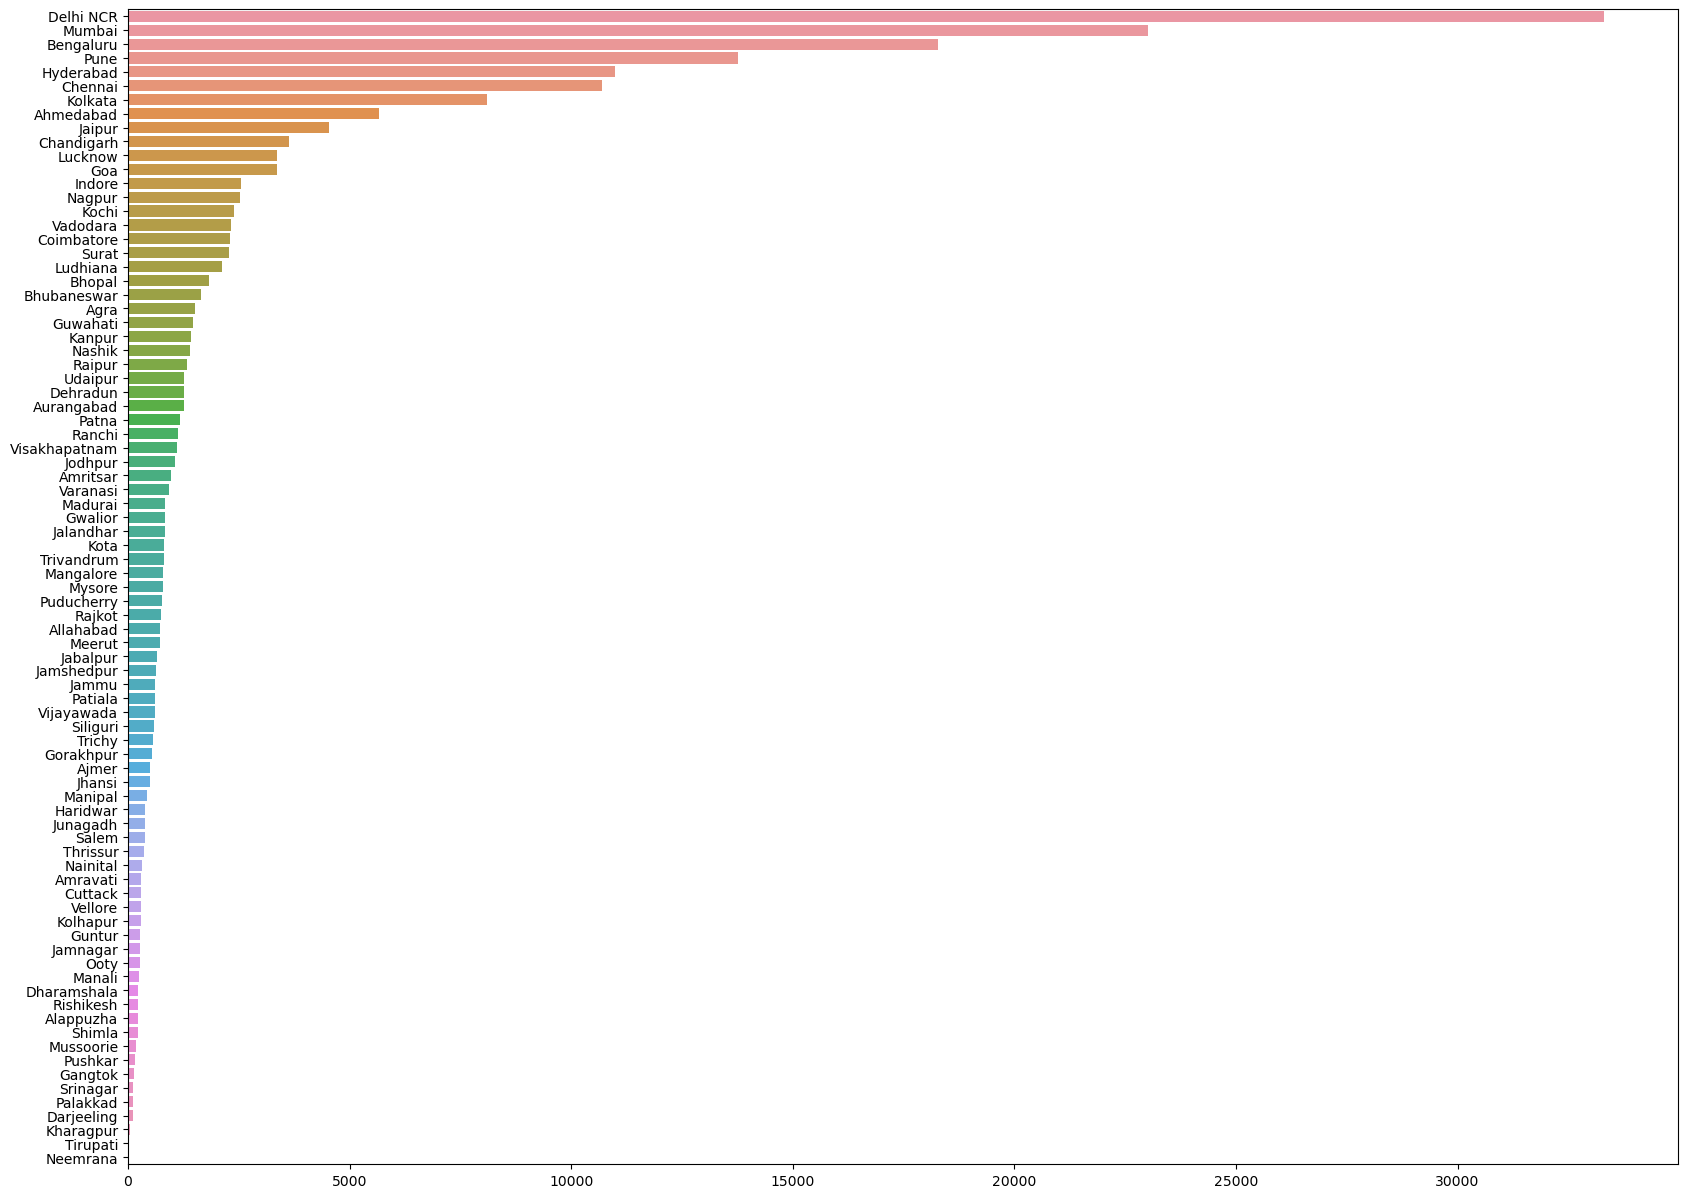

In [23]:
city_names=df.city.value_counts().index
city_val=df.city.value_counts().values
plt.figure(figsize=( 20,15))
sns.barplot(x=city_val,y=city_names)

# multivariate 

<Axes: >

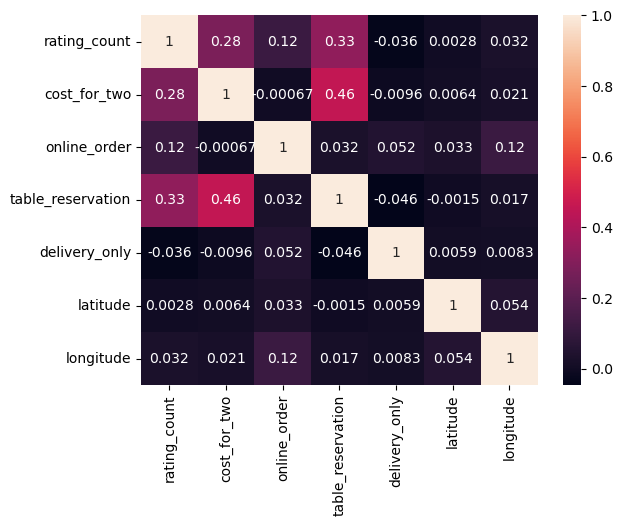

In [25]:
sns.heatmap(df.corr(),annot=True)

we can say that all the numerical columns were significantlly dependent on target variable

In [26]:
df.corr()

,rating_count,cost_for_two,online_order,table_reservation,delivery_only,latitude,longitude
rating_count,1.000000,0.284629,0.115744,0.332444,-0.036263,0.002825,0.031630
cost_for_two,0.284629,1.000000,-0.000671,0.455177,-0.009566,0.006379,0.021496
online_order,0.115744,-0.000671,1.000000,0.031616,0.051939,0.032865,0.116434
table_reservation,0.332444,0.455177,0.031616,1.000000,-0.045908,-0.001494,0.016980
delivery_only,-0.036263,-0.009566,0.051939,-0.045908,1.000000,0.005858,0.008254
latitude,0.002825,0.006379,0.032865,-0.001494,0.005858,1.000000,0.053540
longitude,0.031630,0.021496,0.116434,0.016980,0.008254,0.053540,1.000000


# Most popular restuarent names in Delhi NCR

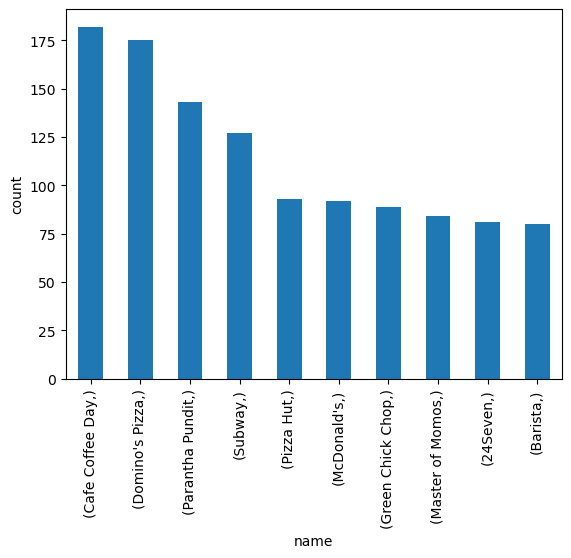

In [27]:
del_city=df[df['city']=='Delhi NCR']
pltct=del_city[['name']].value_counts().head(10)
pltct.plot(kind='bar')
plt.xlabel('name')
plt.ylabel('count')
plt.show()

# Count of Restaurants Offering Delivery-Only Services Across Different Cities

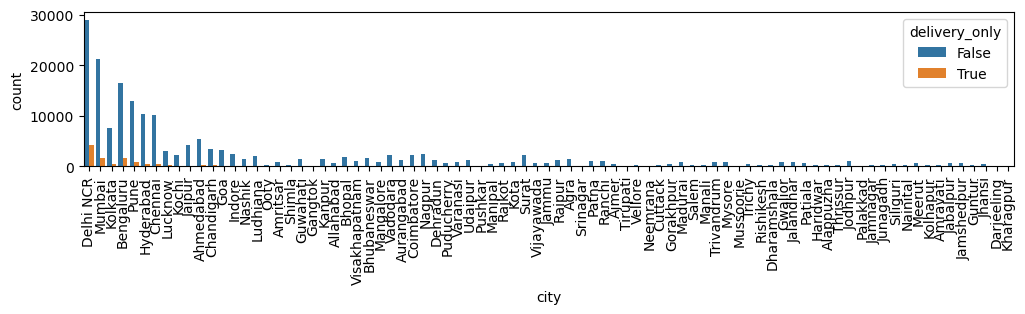

In [28]:
plt.figure(figsize=(12,2))
sns.countplot(x='city',hue='delivery_only',data=df)
plt.xticks(rotation=90)
plt.show()

# Count of Restaurants with Table Reservation Services Across Different Cities

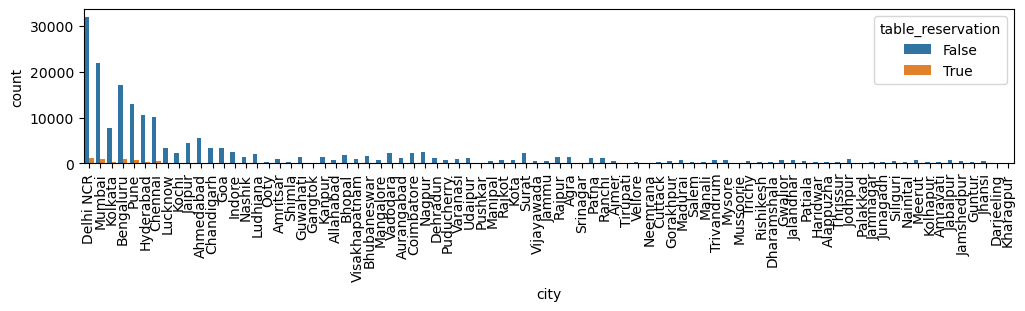

In [29]:
plt.figure(figsize=(12,2))
sns.countplot(x='city',hue='table_reservation',data=df)
plt.xticks(rotation=90)
plt.show()

# Count of Restaurants Offering Online Ordering Services Across Different Cities

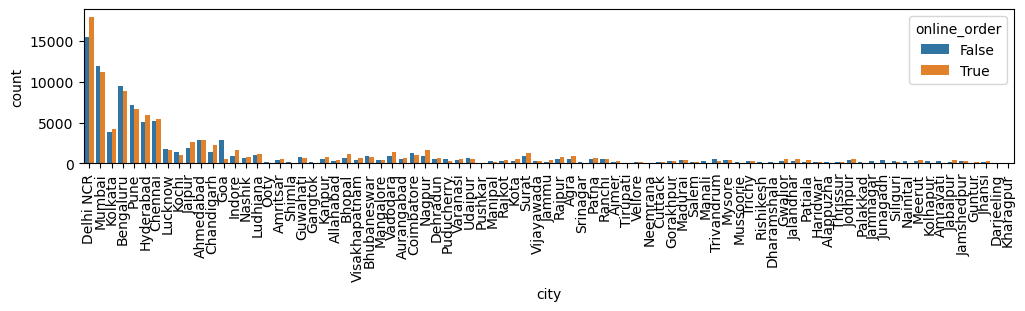

In [30]:
plt.figure(figsize=(12,2))
sns.countplot(x=df['city'],hue='online_order',data=df)
plt.xticks(rotation=90)
plt.show()

rating_count


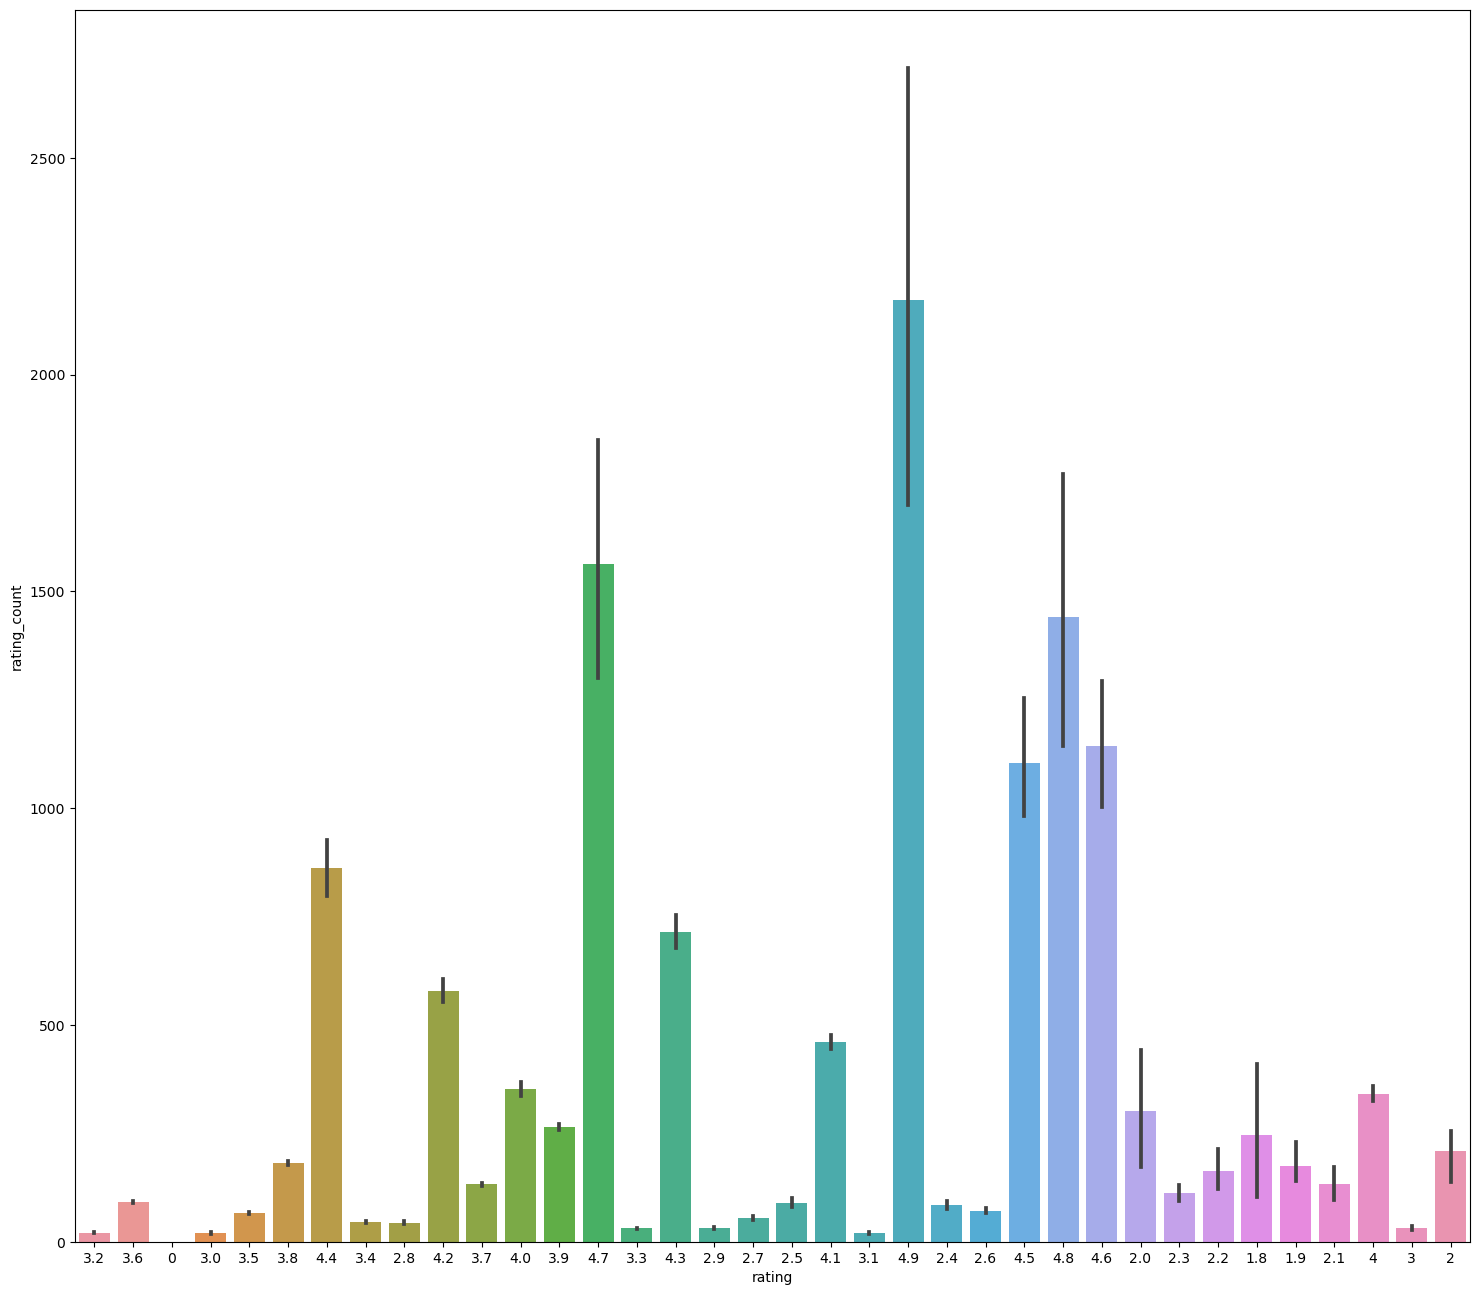

cost_for_two


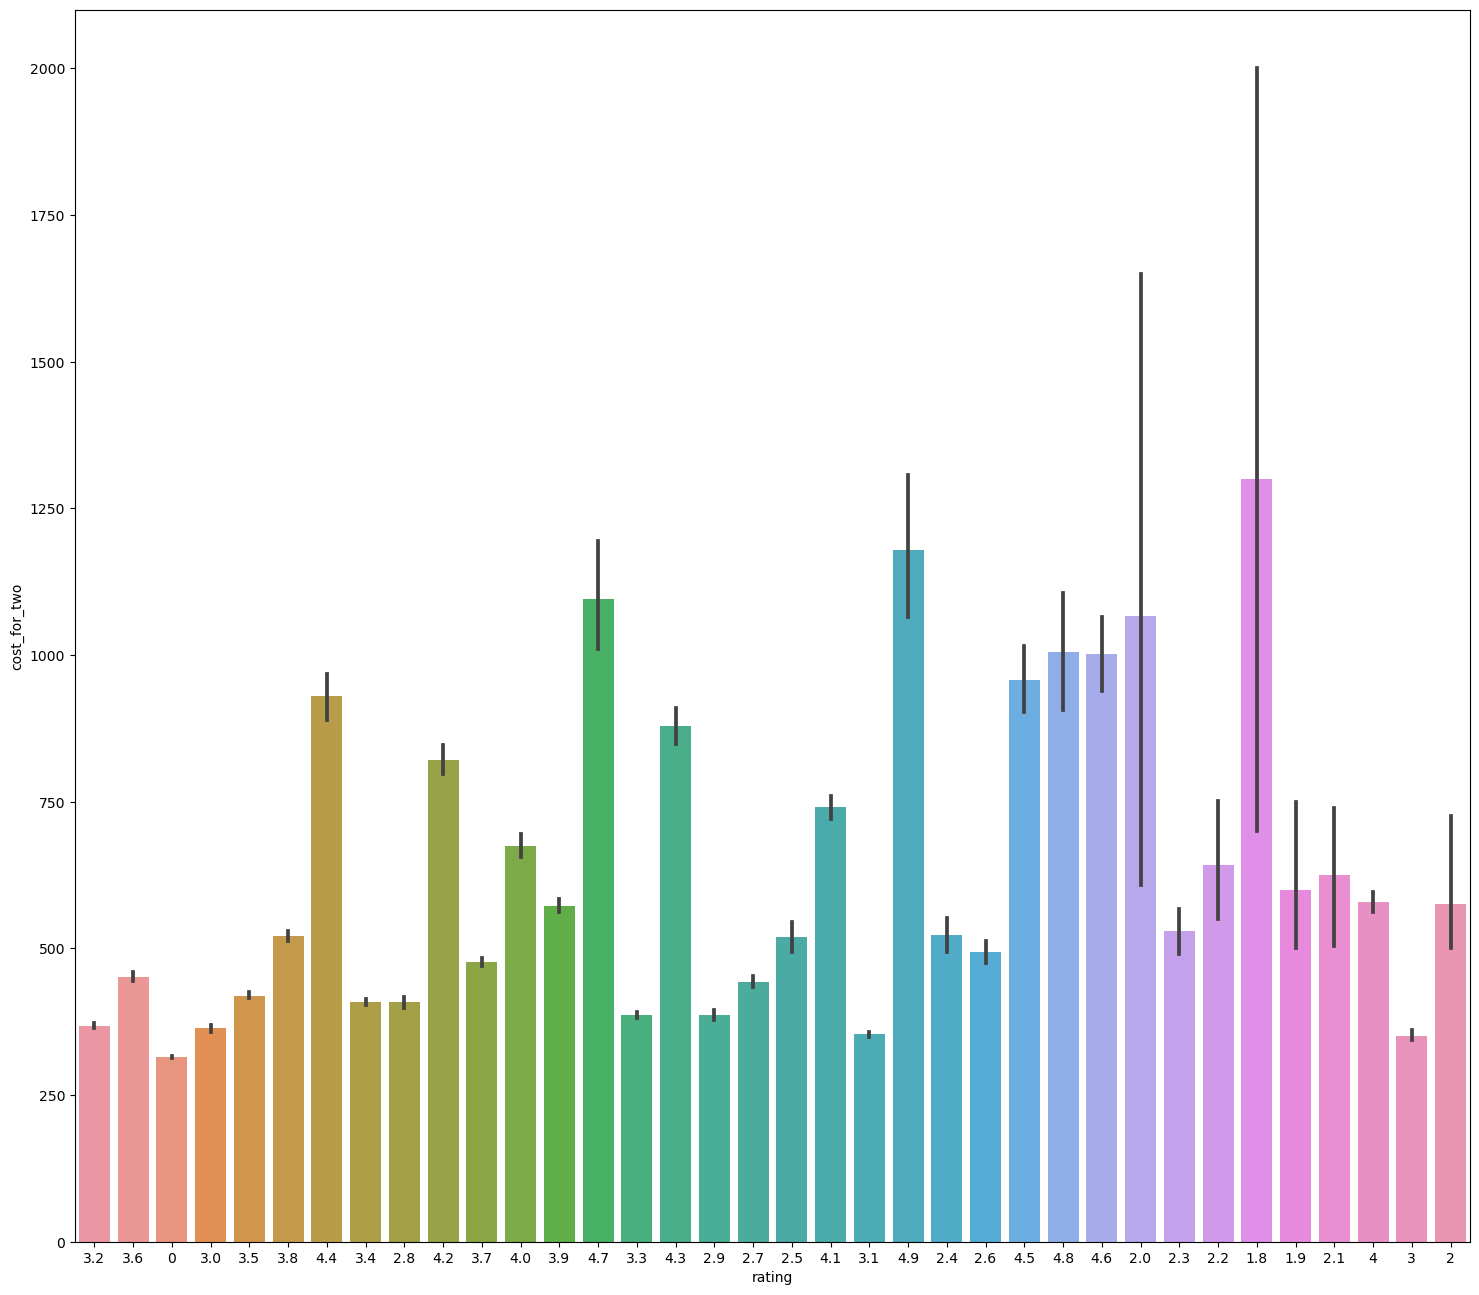

latitude


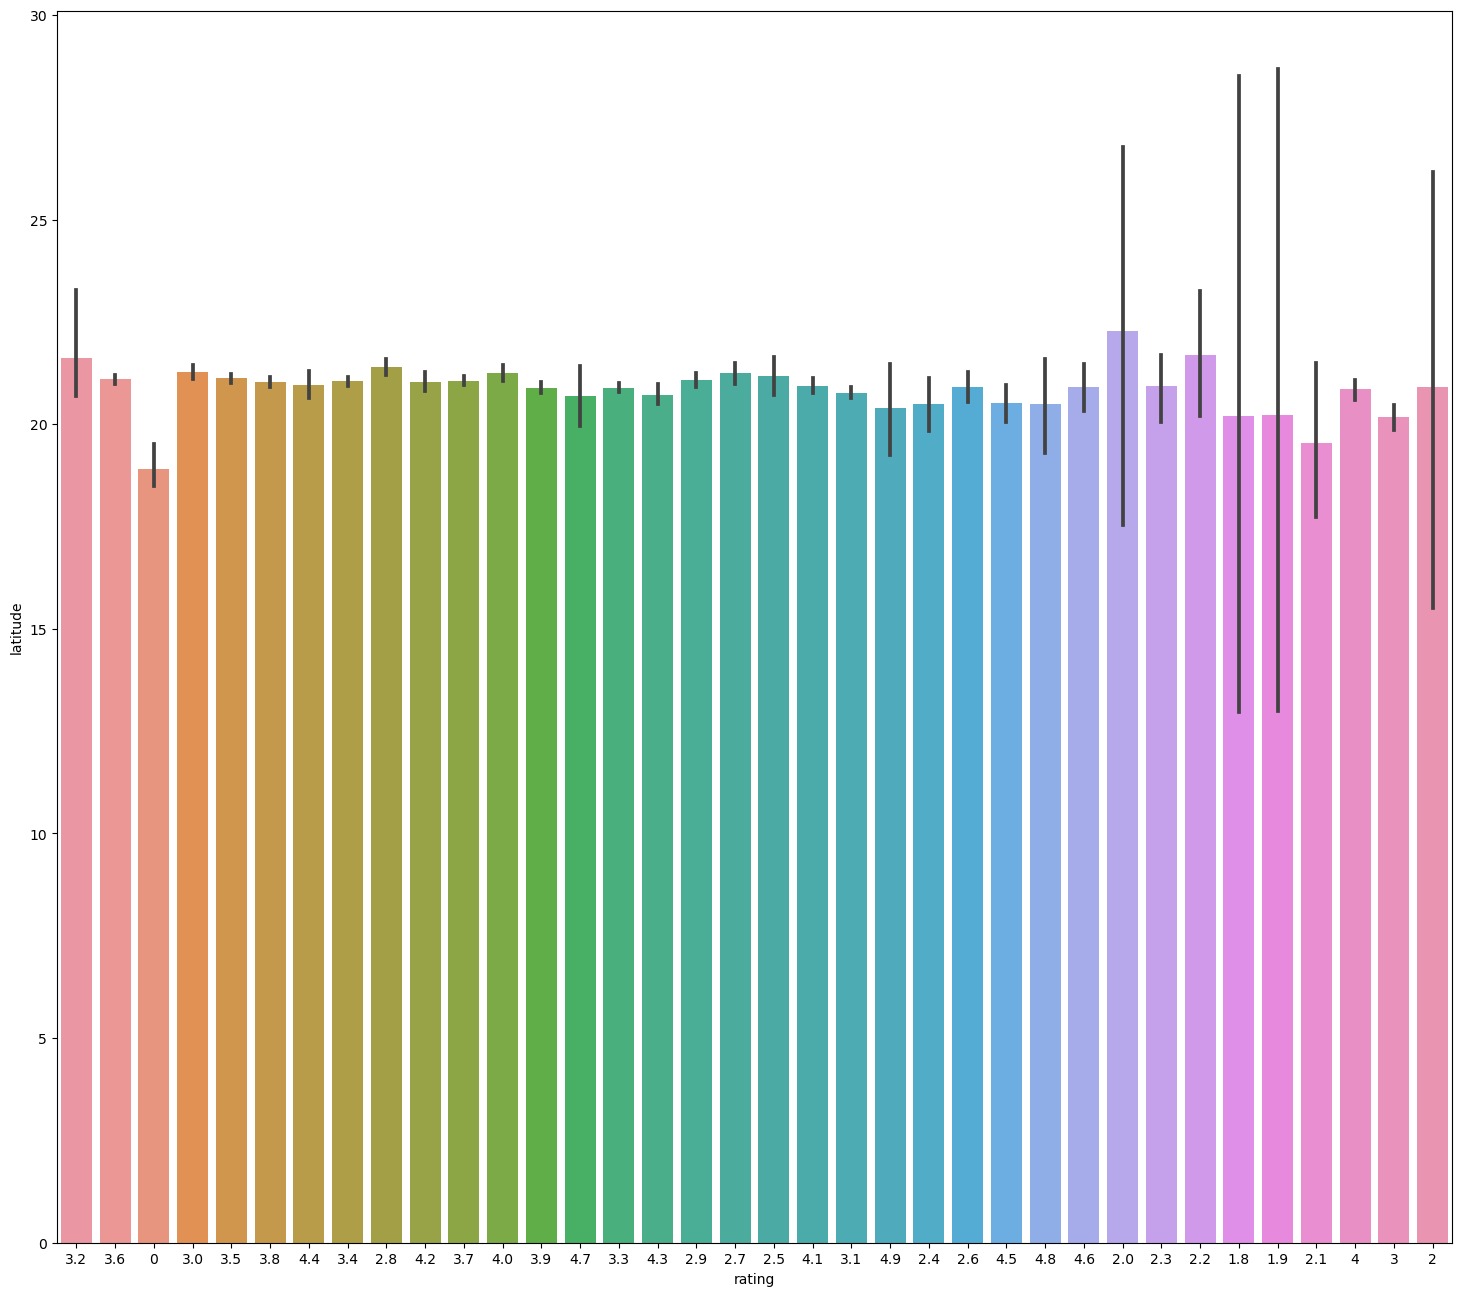

longitude


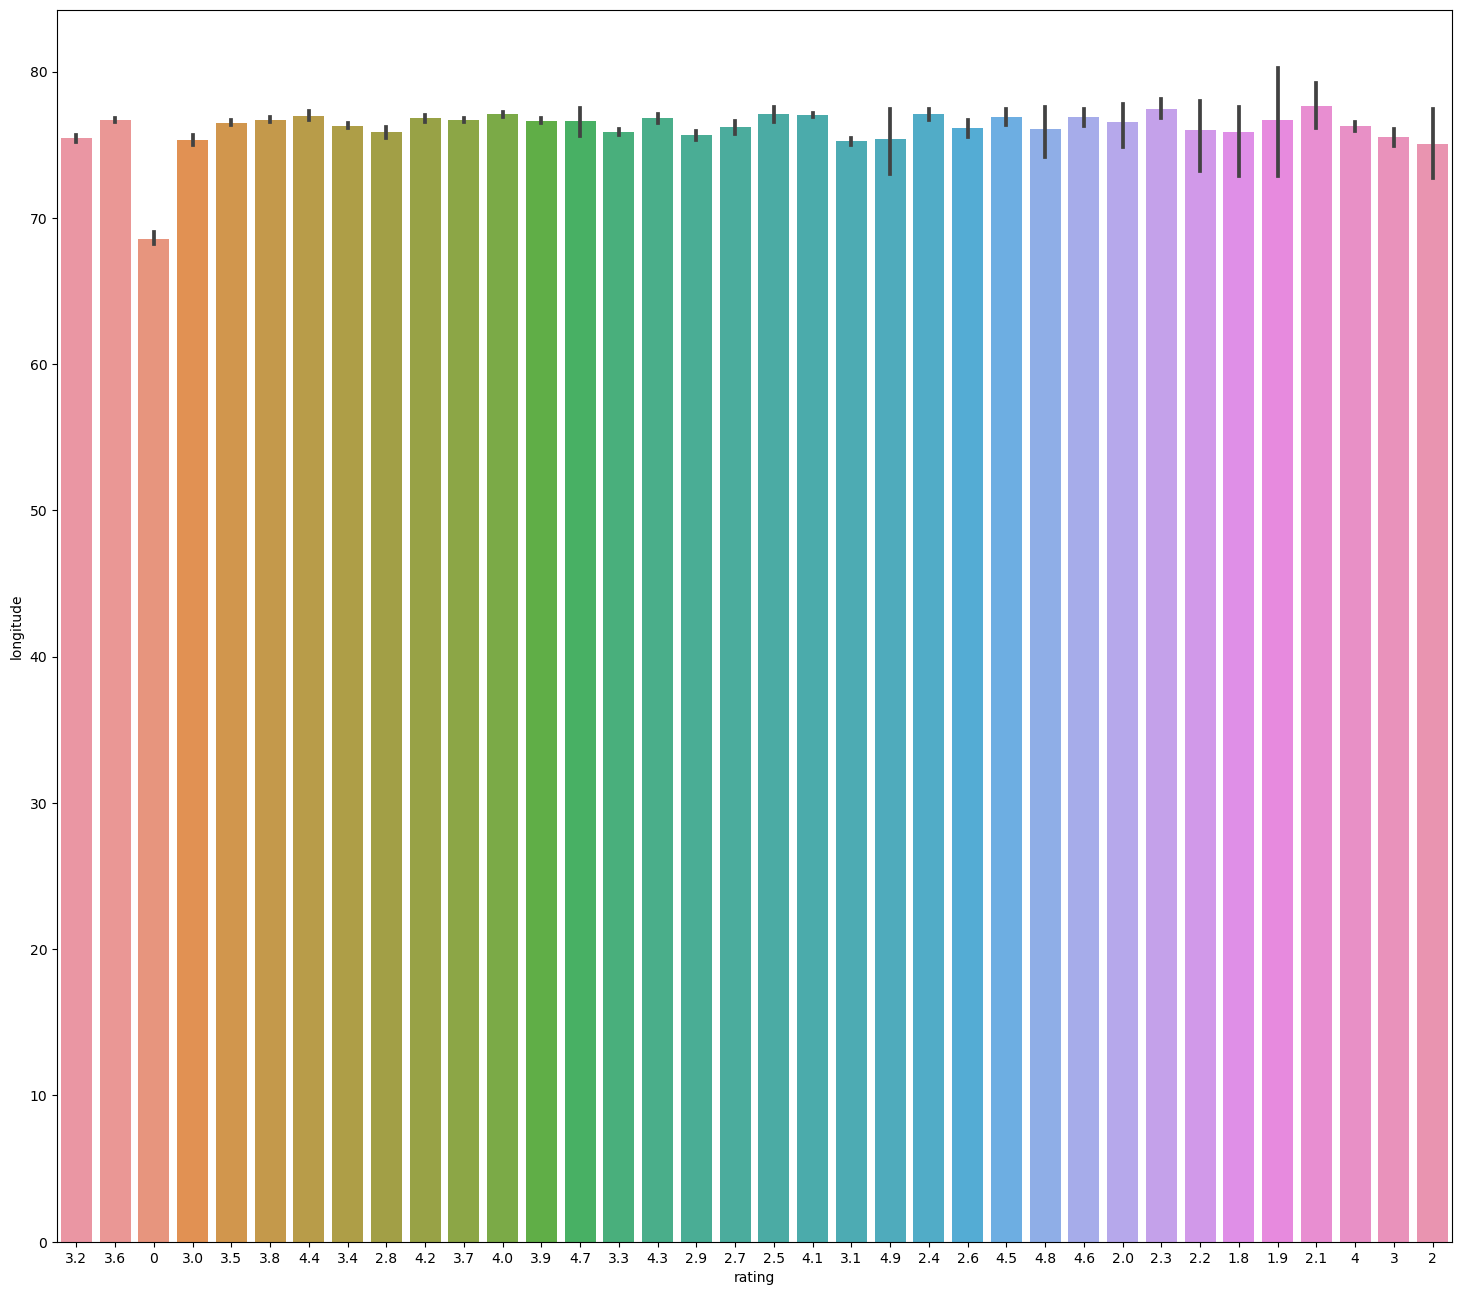

In [31]:
for i in df.select_dtypes(include=np.number).columns:
    #plt.subplot(4,2,t)
    print(i)
    plt.figure(figsize=(18,16))
    sns.barplot(y=df[i],x=df['rating']) # for visualization we are plot on x-axis with our target variable
    #t+=1
    plt.show()

### Outlier check

rating_count


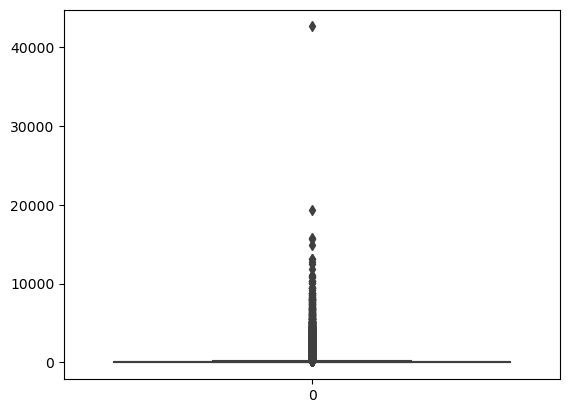

cost_for_two


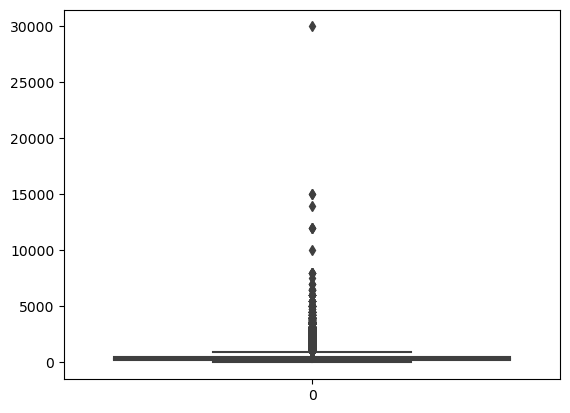

latitude


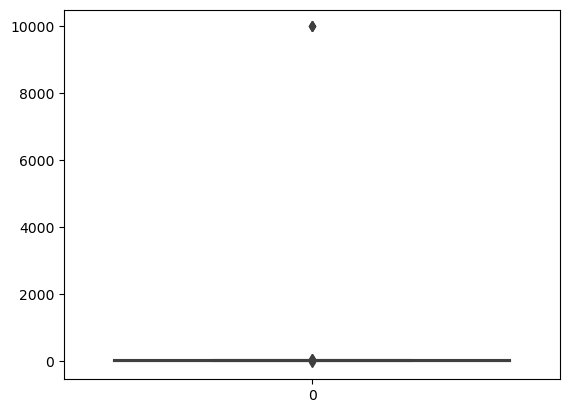

longitude


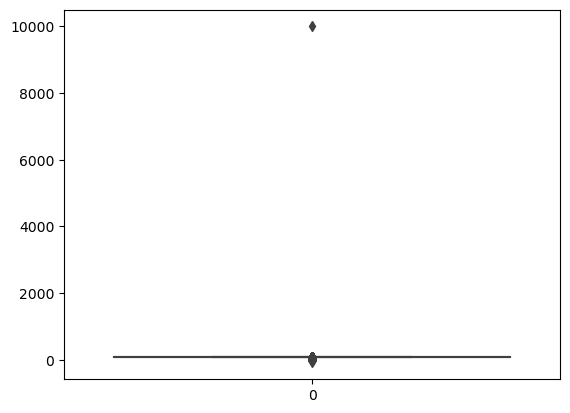

In [22]:
# visualizing outliers in numeric data

for i in df.select_dtypes(include=np.number):
    print(i)
    sns.boxplot(df[i])
    plt.show()

### Normality check on numerical columns

In [23]:
# checking for normality using jarque_bera
 
import scipy.stats
from scipy.stats import jarque_bera

for i in df.select_dtypes(include=np.number):
    x=jarque_bera(df[i].dropna())
    if x[1]>0.05:
        print(i, '--','pvalue',x[1], '----------','not significant')
    else:
        print(i, '--', 'pvalue', x[1], 'significant')

rating_count -- pvalue 0.0 significant
cost_for_two -- pvalue 0.0 significant
latitude -- pvalue 0.0 significant
longitude -- pvalue 0.0 significant


### statistical test on  numerical columns

In [27]:
# statistical test on  numerical columns

l_pvalue=[]
for i in df.select_dtypes(include=np.number):
    print(i)

    contingency_table = pd.crosstab(df['rating'], df[i])

    # Chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    l_pvalue.append(round(p,2))
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")
    print("------------------------------------")
    

rating_count
Chi-squared statistic: 799710.4374794299
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
------------------------------------
cost_for_two
Chi-squared statistic: 52490.12309482161
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
------------------------------------
latitude
Chi-squared statistic: 6544109.474371972
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
------------------------------------
longitude
Chi-squared statistic: 6452066.252179695
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
------------------------------------


In [28]:

l_pvalue=[]
for i in df.select_dtypes(exclude=np.number):
    print(i)

    contingency_table = pd.crosstab(df['rating'], df[i])

    # Chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    l_pvalue.append(round(p,2))
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")
    print("-----------------------------------")

zomato_url
Chi-squared statistic: 6887545.000000001
P-value: 0.4961662917442707
Fail to reject the null hypothesis. No significant difference.
-----------------------------------
name
Chi-squared statistic: 4208654.03753806
P-value: 1.0
Fail to reject the null hypothesis. No significant difference.
-----------------------------------
city
Chi-squared statistic: 16774.5391204265
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
-----------------------------------
area
Chi-squared statistic: 112744.89332745114
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
-----------------------------------
rating
Chi-squared statistic: 6887545.0
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
-----------------------------------
telephone
Chi-squared statistic: 6161502.561543169
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
-----------------------------------
cusine
Chi-squared statistic: 101

#### we can say that all the numerical columns were significantlly dependent on target variable

# Categorical Columns Analysis

In [29]:
# checking counts, unique subclasses in each column

for i in df.select_dtypes(exclude=np.number):
    print(i)
    print('null values:', df[i].isnull().sum())
    print('Unique_subclasses_total:', df[i].nunique())
    print('Unique_subclasses:', df[i].unique())
    print('-'*30)


zomato_url
null values: 0
Unique_subclasses_total: 196787
Unique_subclasses: ['https://www.zomato.com/ncr/sainik-food-pandav-nagar-delhi'
 'https://www.zomato.com/mumbai/kunals-creamery-eatery-ambernath-thane'
 'https://www.zomato.com/ncr/brij-palace-restaurant-jasola-new-delhi' ...
 'https://www.zomato.com/dharamshala/norling-restaurant-mcleodganj'
 'https://www.zomato.com/dharamshala/kalimpong-restaurant-mcleodganj'
 'https://www.zomato.com/dharamshala/street-cafe-mcleodganj']
------------------------------
name
null values: 0
Unique_subclasses_total: 127687
Unique_subclasses: ['Sainik Food' "Kunal's Creamery & Eatery" 'Brij Palace Restaurant' ...
 'The Simple Cafe' 'Norling Restaurant' 'Kalimpong Restaurant']
------------------------------
city
null values: 0
Unique_subclasses_total: 83
Unique_subclasses: ['Delhi NCR' 'Mumbai' 'Kolkata' 'Bengaluru' 'Pune' 'Hyderabad' 'Chennai'
 'Lucknow' 'Kochi' 'Jaipur' 'Ahmedabad' 'Chandigarh' 'Goa' 'Indore'
 'Nashik' 'Ludhiana' 'Ooty' 'Amritsar' 

### there were null values for 3 columns
* address
* timings
* famous_food

To impute null values, im cross checking, whether that columns were significant or| not

In [24]:
df.columns

Index(['zomato_url', 'name', 'city', 'area', 'rating', 'rating_count',
       'telephone', 'cusine', 'cost_for_two', 'address', 'timings',
       'online_order', 'table_reservation', 'delivery_only', 'famous_food',
       'latitude', 'longitude'],
      dtype='object')

In [25]:
# checking statistical test for categorical column

p_mat_n=[]
for i in df.select_dtypes(exclude=np.number):
    print(i)

    contingency_table = pd.crosstab(df['rating'], df[i])

    # Chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_mat_n.append(round(p,2))
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")
    print("--------------------------------------------------------------------")
    

zomato_url
Chi-squared statistic: 6887545.000000001
P-value: 0.4961662917442707
Fail to reject the null hypothesis. No significant difference.
--------------------------------------------------------------------
name
Chi-squared statistic: 4208654.03753806
P-value: 1.0
Fail to reject the null hypothesis. No significant difference.
--------------------------------------------------------------------
city
Chi-squared statistic: 16774.5391204265
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
--------------------------------------------------------------------
area
Chi-squared statistic: 112744.89332745114
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
--------------------------------------------------------------------
rating
Chi-squared statistic: 6887545.0
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
--------------------------------------------------------------------
telephone
Chi-squared statistic

In [26]:
p_mat_n

[0.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]

In [27]:
p_value_cat1=pd.DataFrame()
p_value_cat1['Features']=df.select_dtypes(exclude=np.number).columns
p_value_cat1['p_values']=p_mat_n

In [28]:
p_value_cat1.sort_values(by='p_values',ascending=True)

,Features,p_values
2,city,0.0
3,area,0.0
4,rating,0.0
5,telephone,0.0
6,cusine,0.0
8,timings,0.0
9,online_order,0.0
10,table_reservation,0.0
11,delivery_only,0.0
0,zomato_url,0.5


#### we can state that cat Vs cat there is a significant dependency on few column that were
* city
* area
* telephone
* cusine
* timings
* online_order
* table_reservation
* delivery_only

In [37]:
chi2_contingency(pd.crosstab(df['address'], df['city']))[1] # showing significant with city

0.0

In [38]:
chi2_contingency(pd.crosstab(df['address'], df['rating']))[1] # showing not significant with rating

1.0

In [29]:
# Dropping "address" column, where address is similar to city & area, thus it is also not significant with target varibale

df= df.drop('address', axis=1)

In [25]:
df.head(2)

,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,timings,online_order,table_reservation,delivery_only,famous_food,latitude,longitude
Unnamed: 0.1,,,,,,,,,,,,,,,,
0,https://www.zomato.com/ncr/sainik-food-pandav-...,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21,011 22486474 +91 9717806814,North Indian,300,"{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",False,False,False,NaN,28.617732,77.284871
1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500,"{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...",False,False,False,Penne Pasta,19.205887,73.184287


In [35]:
# imputing null values for "timings" based on weightages

weights = df['timings'].value_counts(normalize=True)

null_indices = df['timings'].isnull()

# Replace null values with weighted sampling
df.loc[null_indices, 'timings'] = np.random.choice(weights.index, size=sum(null_indices), p=weights.values)

In [36]:
df['timings'].isnull().sum()

0

In [37]:
df.isnull().sum()

zomato_url           0
name                 0
city                 0
area                 0
rating               0
rating_count         0
telephone            0
cusine               0
cost_for_two         0
timings              0
online_order         0
table_reservation    0
delivery_only        0
famous_food          0
latitude             0
longitude            0
dtype: int64

#### Hence there are no null values

# Num, Cat columns seperation

In [38]:
if df['famous_food'].isnull().any():
    df['famous_food'].fillna('no', inplace=True)

df['famous_food'] = df['famous_food'].apply(lambda x: 'yes' if x != 'no' else 'no')


df['famous_food'].unique()

array(['no', 'yes'], dtype=object)

In [39]:
num= df.select_dtypes(include=np.number)
cat= df.select_dtypes(exclude=np.number)

In [40]:
num.columns

Index(['rating_count', 'cost_for_two', 'latitude', 'longitude'], dtype='object')

# Treating Outliers

In [41]:
# capping
for i in num.columns:
    q1=num[i].quantile(0.25)
    q3=num[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    num[i]=num[i].apply(lambda x:ll if x<ll else ul if x>ul else x)

rating_count


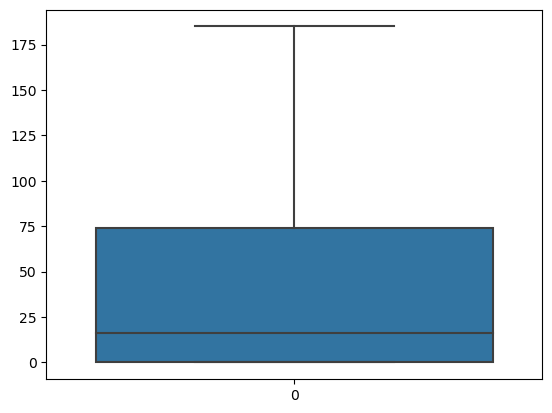

cost_for_two


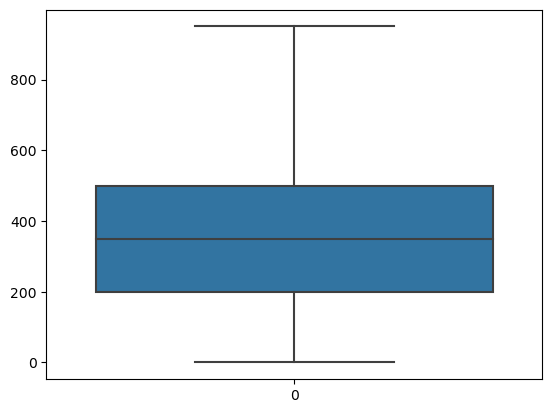

latitude


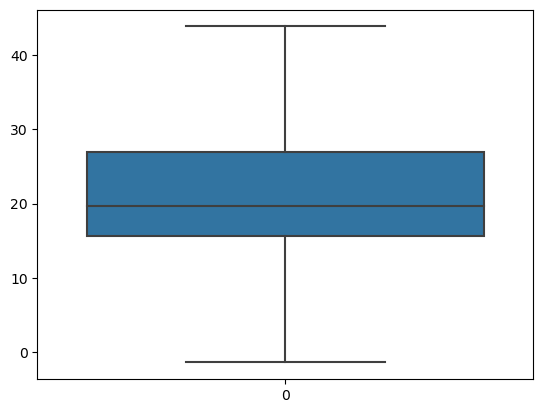

longitude


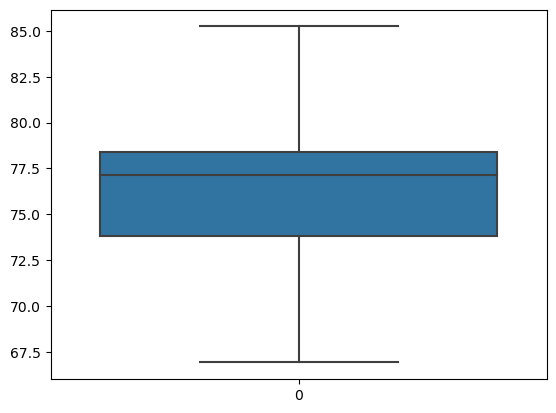

In [42]:
# visualizing after outlier treatement

for i in num:
    print(i)
    sns.boxplot(num[i])
    plt.show()

In [60]:
num.shape

(196787, 4)

# Encoding

### before encoding 
* 'zomato_url'
* 'name' 
* the above mentioned columns are having more unique classes & statistically not significant for the model, so we drop those columns

In [43]:
cat=cat.drop(['zomato_url','name'], axis=1)
cat.head(2)

,city,area,rating,telephone,cusine,timings,online_order,table_reservation,delivery_only,famous_food
Unnamed: 0.1,,,,,,,,,,
0,Delhi NCR,Pandav Nagar,3.2,011 22486474 +91 9717806814,North Indian,"{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",False,False,False,no
1,Mumbai,Ambernath,3.6,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...",False,False,False,yes


In [44]:
cat.shape

(196787, 10)

In [45]:
# for encoding 
cat_t= cat['rating']
print(cat_t.head(2))
print(cat_t.shape)

Unnamed: 0.1
0    3.2
1    3.6
Name: rating, dtype: object
(196787,)


In [46]:
# label encoding

cat= cat.drop('rating', axis=1)
cat.head(2)

,city,area,telephone,cusine,timings,online_order,table_reservation,delivery_only,famous_food
Unnamed: 0.1,,,,,,,,,
0,Delhi NCR,Pandav Nagar,011 22486474 +91 9717806814,North Indian,"{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",False,False,False,no
1,Mumbai,Ambernath,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...",False,False,False,yes


In [47]:
# label encoding apart from target column

le=LabelEncoder()

# Assuming cat is your DataFrame containing categorical columns
for i in cat.columns:
    cat[i] = le.fit_transform(cat[i])

In [41]:
cat.columns

Index(['city', 'area', 'telephone', 'cusine', 'timings', 'online_order',
       'table_reservation', 'delivery_only', 'famous_food'],
      dtype='object')

In [42]:
cat.shape

(196787, 9)

# Concat Num and Cat

In [48]:
df1=pd.concat([num,cat, cat_t], axis=1)
df1.head()

,rating_count,cost_for_two,latitude,longitude,city,area,telephone,cusine,timings,online_order,table_reservation,delivery_only,famous_food,rating
Unnamed: 0.1,,,,,,,,,,,,,,
0,21.0,300.0,28.617732,77.284871,17,1542,136650,11923,2056,0,0,0,0,3.2
1,51.0,500.0,19.205887,73.184287,50,80,81625,17480,7750,0,0,0,1,3.6
2,0.0,250.0,28.563034,77.291223,17,822,117569,11923,3375,0,0,0,1,0
3,0.0,300.0,28.642411,77.218298,17,1510,89919,11923,12267,0,0,0,0,0
4,78.0,500.0,22.577758,85.241790,41,2109,38267,10030,12983,1,0,0,0,3.0


In [49]:
df1.shape

(196787, 14)

In [50]:
df1['rating'].value_counts()

0      52052
3.3    12991
3.4    12901
3.5    12578
3.2    12220
3.6    12206
3.7    11411
3.8    10194
3.1     9650
3.9     8647
3.0     5939
2.9     5604
4.1     4825
4.0     4125
2.8     3677
4.2     3290
4       2639
4.3     2246
2.7     2098
3       1937
4.4     1370
2.6     1170
4.5      806
2.5      585
4.6      474
2.4      329
4.7      253
2.3      184
4.8      138
4.9      132
2.2       69
2.1       31
2.0        6
2          4
1.8        3
1.9        3
Name: rating, dtype: int64

In [51]:
df1.isnull().sum()

rating_count         0
cost_for_two         0
latitude             0
longitude            0
city                 0
area                 0
telephone            0
cusine               0
timings              0
online_order         0
table_reservation    0
delivery_only        0
famous_food          0
rating               0
dtype: int64

In [52]:
df1.duplicated().sum()

332

In [53]:
df1.drop_duplicates(keep='first', inplace=True)

In [49]:
df1.shape

(196455, 14)

# Scaling

In [54]:
# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

ss=StandardScaler()
df_sc=ss.fit_transform(df1)
df_sc=pd.DataFrame(df1,columns=df1.columns)
df_sc.head(2)

,rating_count,cost_for_two,latitude,longitude,city,area,telephone,cusine,timings,online_order,table_reservation,delivery_only,famous_food,rating
Unnamed: 0.1,,,,,,,,,,,,,,
0,21.0,300.0,28.617732,77.284871,17,1542,136650,11923,2056,0,0,0,0,3.2
1,51.0,500.0,19.205887,73.184287,50,80,81625,17480,7750,0,0,0,1,3.6


# Subdivided Ratings

# Target variable

In [55]:
df_sc['rating'] = pd.to_numeric(df_sc['rating'], errors='coerce')
df_sc['rating'].dtype

dtype('float64')

In [56]:
df_sc['rating'] = np.select(
    [df_sc['rating'] > 3.5, (df_sc['rating'] >= 2) & (df_sc['rating'] <= 3.5), df_sc['rating'] < 2],
    ['Good', 'Moderate', 'Poor'])

<Axes: xlabel='rating', ylabel='count'>

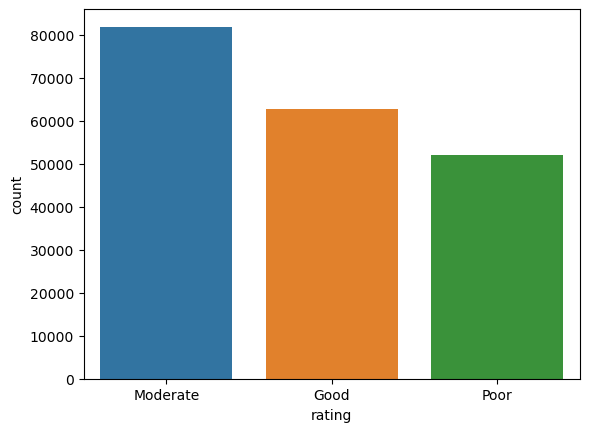

In [57]:
sns.countplot(data=df_sc,x='rating')

# Train Test Split

In [86]:
x=df_sc.drop("rating",axis=1)
y=df_sc[["rating"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=100)

# Logistic Regression

In [59]:
lr=LogisticRegression()
model_lr=lr.fit(x_train,y_train)
ypred=model_lr.predict(x_test)

In [60]:
print(classification_report(y_test,ypred))
print(cohen_kappa_score(y_test,ypred))

              precision    recall  f1-score   support

        Good       0.53      0.52      0.53     15548
    Moderate       0.46      0.70      0.55     20606
        Poor       0.56      0.09      0.16     12960

    accuracy                           0.48     49114
   macro avg       0.52      0.44      0.41     49114
weighted avg       0.51      0.48      0.44     49114

0.168440007120228


In [61]:
accuracy_score(y_test,ypred)

0.48489229140367307

In [61]:
#train
lr=LogisticRegression()
model_lrtrain=lr.fit(x_train,y_train)
ypred_train=model_lrtrain.predict(x_train)
accuracy_train=accuracy_score(y_train,ypred_train)
print("accuracy of train:",accuracy_train)
print(classification_report(y_train,ypred_train))

accuracy of train: 0.4846241032706443
              precision    recall  f1-score   support

        Good       0.54      0.53      0.53     47106
    Moderate       0.46      0.72      0.56     61303
        Poor       0.61      0.06      0.10     38932

    accuracy                           0.48    147341
   macro avg       0.53      0.44      0.40    147341
weighted avg       0.52      0.48      0.43    147341



# Decision Tree Classifier

In [62]:
#test
dt=DecisionTreeClassifier(criterion="gini",random_state=100) # with gini
model_dt=dt.fit(x_train,y_train)
ypred=model_dt.predict(x_test)

In [63]:
print(classification_report(y_test,ypred))
print(cohen_kappa_score(y_test,ypred))

              precision    recall  f1-score   support

        Good       0.72      0.72      0.72     15548
    Moderate       0.79      0.79      0.79     20606
        Poor       0.97      0.96      0.96     12960

    accuracy                           0.81     49114
   macro avg       0.83      0.83      0.83     49114
weighted avg       0.81      0.81      0.81     49114

0.7162852827496765


In [62]:
#train
dt=DecisionTreeClassifier(criterion="gini",random_state=100) # with gini
model_dt=dt.fit(x_train,y_train)
ypred=model_dt.predict(x_train)
print(classification_report(y_train,ypred))
print(accuracy_score(y_train,ypred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     47106
    Moderate       1.00      1.00      1.00     61303
        Poor       1.00      1.00      1.00     38932

    accuracy                           1.00    147341
   macro avg       1.00      1.00      1.00    147341
weighted avg       1.00      1.00      1.00    147341

0.9999932130228517


In [85]:
#test
dt=DecisionTreeClassifier(criterion="entropy",random_state=100) # with entropy
model_dt=dt.fit(x_train,y_train)
ypred=model_dt.predict(x_test)

In [86]:
print(classification_report(y_test,ypred))
print(cohen_kappa_score(y_test,ypred))

              precision    recall  f1-score   support

        Good       0.72      0.72      0.72     15580
    Moderate       0.78      0.78      0.78     20550
        Poor       0.97      0.96      0.96     12984

    accuracy                           0.81     49114
   macro avg       0.82      0.82      0.82     49114
weighted avg       0.81      0.81      0.81     49114

0.7089209114900454


In [63]:
#train
dt=DecisionTreeClassifier(criterion="entropy",random_state=100) # with gini
model_dt=dt.fit(x_train,y_train)
ypred=model_dt.predict(x_train)
print(classification_report(y_train,ypred))
print(accuracy_score(y_train,ypred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     47106
    Moderate       1.00      1.00      1.00     61303
        Poor       1.00      1.00      1.00     38932

    accuracy                           1.00    147341
   macro avg       1.00      1.00      1.00    147341
weighted avg       1.00      1.00      1.00    147341

0.9999932130228517


In [87]:
model_dt.feature_importances_

array([0.69536446, 0.02452373, 0.05026432, 0.04004088, 0.01215046,
       0.03545099, 0.04727533, 0.0445384 , 0.03927873, 0.00709488,
       0.00089468, 0.00312315, 0.        ])

<Axes: xlabel='Importance', ylabel='Features'>

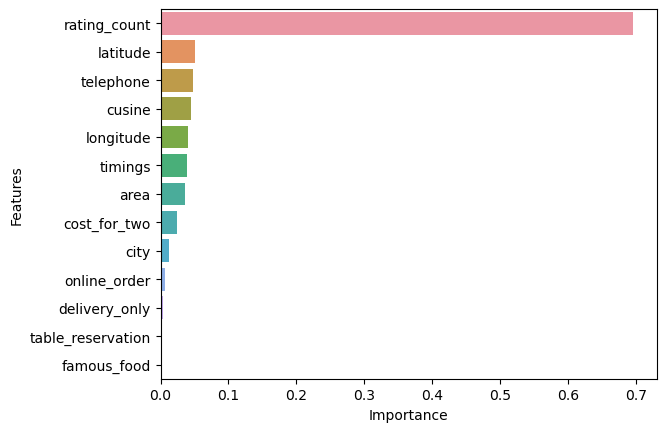

In [88]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': model_dt.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

In [89]:
important_features

,Features,Importance
0,rating_count,0.695364
2,latitude,0.050264
6,telephone,0.047275
7,cusine,0.044538
3,longitude,0.040041
8,timings,0.039279
5,area,0.035451
1,cost_for_two,0.024524
4,city,0.012150
9,online_order,0.007095


"In conclusion, the model demonstrates a good performance with an overall accuracy of 81%. It exhibits good precision, recall, and F1-score across the 'Good', 'Moderate', and 'Poor' classes, suggesting a balanced predictive capability. The weighted average metrics further support the model's effectiveness in handling imbalanced class distribution. However, the ultimate judgment on the model's suitability depends on the specific context and the trade-off between precision and recall required for the given application. Further fine-tuning or exploration of alternative models could be considered to optimize performance based on the unique requirements of the task at hand."

### random forest model 

In [87]:
rf=RandomForestClassifier()
model_rf=rf.fit(x_train,y_train)
ypred=model_rf.predict(x_test)

In [88]:
print(classification_report(y_test,ypred))
print(cohen_kappa_score(y_test,ypred))

              precision    recall  f1-score   support

        Good       0.79      0.82      0.80     15548
    Moderate       0.87      0.83      0.85     20606
        Poor       0.96      1.00      0.98     12960

    accuracy                           0.87     49114
   macro avg       0.87      0.88      0.88     49114
weighted avg       0.87      0.87      0.87     49114

0.79952200943715


In [66]:
print(accuracy_score(y_test,ypred))

0.8678991733517938


In [67]:
#train data 
rf=RandomForestClassifier(n_estimators=50)
model_rf=rf.fit(x_train,y_train)
ypred=model_rf.predict(x_train)
print(classification_report(y_train,ypred))
print(cohen_kappa_score(y_train,ypred))
print(accuracy_score(y_train,ypred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     47139
    Moderate       1.00      1.00      1.00     61247
        Poor       1.00      1.00      1.00     38955

    accuracy                           1.00    147341
   macro avg       1.00      1.00      1.00    147341
weighted avg       1.00      1.00      1.00    147341

0.999564781569347
0.9997149469597736


In [93]:
model_rf.feature_importances_

array([0.61701607, 0.04128148, 0.05262159, 0.04883159, 0.0182863 ,
       0.03961098, 0.05099542, 0.04512292, 0.04098861, 0.02891842,
       0.01307631, 0.00325033, 0.        ])

<Axes: xlabel='Importance', ylabel='Features'>

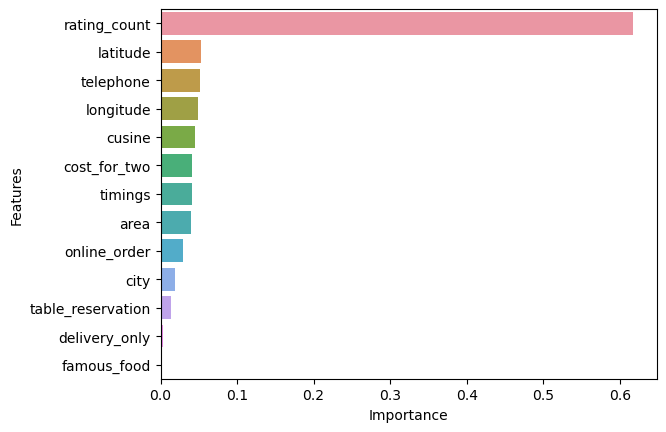

In [94]:
important_features = pd.DataFrame({'Features': x_train.columns,'Importance': model_rf.feature_importances_})
# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

In [75]:
df2=df1.drop(["delivery_only","famous_food"],axis=1)

In [76]:
df2_sc=pd.get_dummies(df2,drop_first=True)

In [77]:
df2_sc

,rating_count,cost_for_two,latitude,longitude,city,area,telephone,cusine,timings,online_order,table_reservation,rating_Moderate,rating_Poor
Unnamed: 0.1,,,,,,,,,,,,,
0,21.0,300.0,28.617732,77.284871,17,1542,136650,11923,2056,0,0,1,0
1,51.0,500.0,19.205887,73.184287,50,80,81625,17480,7750,0,0,0,0
2,0.0,250.0,28.563034,77.291223,17,822,117569,11923,3375,0,0,0,1
3,0.0,300.0,28.642411,77.218298,17,1510,89919,11923,12267,0,0,0,1
4,78.0,500.0,22.577758,85.241790,41,2109,38267,10030,12983,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224513,0.0,500.0,32.196326,76.357583,18,1716,21071,12539,7447,1,0,0,1
224514,0.0,250.0,32.196908,76.358132,18,399,111322,4089,5831,1,0,0,1
224515,4.0,400.0,32.237152,76.324329,18,1285,4191,5987,9575,0,0,1,0


In [79]:
x1=df2_sc.drop(["rating_Moderate","rating_Poor"],axis=1)
y1=df2_sc[['rating_Moderate','rating_Poor']]
x1train,y1train,x1test,y1test=train_test_split(x1,y1,random_state=1)

In [80]:
rf1=()
mrf=rf1.fit(x1train,y1train)
ypred_mmr=mrf.predict(x1test)
print(accuracy_score(y1test,ypred_mmr))

ValueError: Found input variables with inconsistent numbers of samples: [147341, 49114]

In [ ]:
# random forest tunned

In [95]:
params = [{'criterion': ['entropy', 'gini'],
            'n_estimators': [100],
            'max_depth': [10, 15],
            'max_features': ['sqrt', 'log2'],
            'min_samples_split': [2, 8],
            'min_samples_leaf': [5, 9],
            'max_leaf_nodes': [8, 11]}]

In [2]:
# rf=RandomForestClassifier(random_state=10)
# rf_cv=GridSearchCV(rf,params,cv=5,scoring='accuracy')
# rf_cv.fit(x_train,y_train)                                 #not able to run 
# rf_cv.best_params_

In [97]:
rf_model=RandomForestClassifier(criterion= 'entropy',
        max_depth= 10,
        max_features='sqrt',
         max_leaf_nodes=8,
         min_samples_leaf= 9,
         min_samples_split= 2,
         n_estimators= 100)
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=8,
                       min_samples_leaf=9)

In [98]:
y_pred=rf_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8302927882070286
[[11709  3580   291]
 [ 4163 16088   299]
 [    2     0 12982]]
              precision    recall  f1-score   support

        Good       0.74      0.75      0.74     15580
    Moderate       0.82      0.78      0.80     20550
        Poor       0.96      1.00      0.98     12984

    accuracy                           0.83     49114
   macro avg       0.84      0.84      0.84     49114
weighted avg       0.83      0.83      0.83     49114



In [100]:
rf_model.feature_importances_

array([7.15364617e-01, 6.17374978e-02, 1.48381828e-02, 2.37135047e-02,
       5.21143698e-04, 0.00000000e+00, 1.31520244e-02, 2.70572196e-03,
       1.94870346e-03, 1.37695290e-01, 2.77687813e-02, 5.54532814e-04,
       0.00000000e+00])

<Axes: xlabel='Importance', ylabel='Features'>

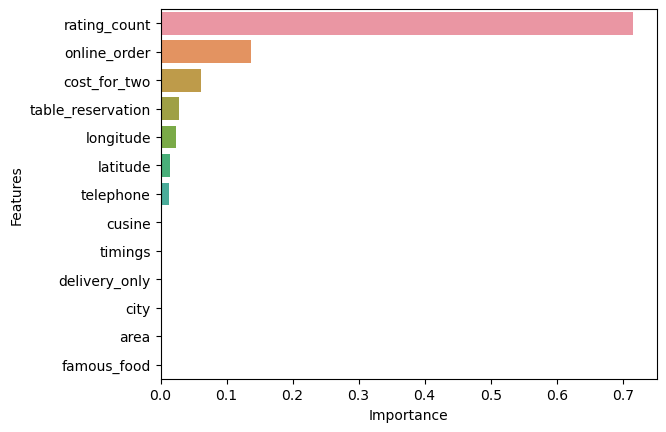

In [99]:
important_features = pd.DataFrame({'Features': x_train.columns,'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

* In this model it is showing that 6 variables does not have any importance to model building so let us build model only with rating count,online_order,cost_for_two,table_reservation,longitude,latitude and telephone.

In [103]:
# X=df_sc.drop(["cusine","timings","delivery_only","city","area","famous_food"],axis=1)
# Y=df_sc["rating"]
# XTRAIN,YTRAIN,XTEST,YTRAIN=train_test_split(X,Y,test_size=0.30,random_state=10)

In [1]:
# rf_model2=RandomForestClassifier(criterion= 'entropy',
#         max_depth= 10,
#         max_features='sqrt',
#          max_leaf_nodes=8,
#          min_samples_leaf= 9,
#          min_samples_split= 2,
#          n_estimators= 100)
# rf_model2.fit(XTRAIN,YTRAIN)

In [ ]:
# bagging classififer -dt

In [107]:
#test
dt=DecisionTreeClassifier(random_state=10)

bc=BaggingClassifier(dt)
bc.fit(x_train,y_train)
ypred_bc=bc.predict(x_test)
print(accuracy_score(y_test,ypred_bc))

0.8490858003827829


In [108]:
print(classification_report(y_test,ypred_bc))
print(cohen_kappa_score(y_test,ypred_bc))

              precision    recall  f1-score   support

        Good       0.75      0.82      0.78     15580
    Moderate       0.86      0.78      0.82     20550
        Poor       0.96      0.99      0.98     12984

    accuracy                           0.85     49114
   macro avg       0.86      0.86      0.86     49114
weighted avg       0.85      0.85      0.85     49114

0.7708551651393509


In [70]:
#train
dt=DecisionTreeClassifier(random_state=10)
bc=BaggingClassifier(dt)
bc.fit(x_train,y_train)
ypred_bc=bc.predict(x_train)
print("classification on train set")
print(accuracy_score(y_train,ypred_bc))
print(classification_report(y_train,ypred_bc))
print(cohen_kappa_score(y_train,ypred_bc))

classification on train set
0.9905525278096389
              precision    recall  f1-score   support

        Good       0.98      0.99      0.99     47106
    Moderate       1.00      0.98      0.99     61303
        Poor       1.00      1.00      1.00     38932

    accuracy                           0.99    147341
   macro avg       0.99      0.99      0.99    147341
weighted avg       0.99      0.99      0.99    147341

0.9855862092634928


In [ ]:
# bagging tunned

In [109]:
dt=DecisionTreeClassifier(random_state=10)
bc=BaggingClassifier(dt,
                    n_estimators=100,
                    max_samples=0.80,
                    max_features=1.0,
                    warm_start=True,
                    oob_score=False,
                    n_jobs=-1)
bc.fit(x_train,y_train)
ypred_bc=bc.predict(x_test)
print(accuracy_score(y_test,ypred_bc))

0.8613837195097122


In [110]:
print(cohen_kappa_score(y_test,ypred_bc))
print(classification_report(y_test,ypred_bc))

0.7891370189951253
              precision    recall  f1-score   support

        Good       0.78      0.81      0.79     15580
    Moderate       0.86      0.81      0.84     20550
        Poor       0.96      1.00      0.98     12984

    accuracy                           0.86     49114
   macro avg       0.87      0.87      0.87     49114
weighted avg       0.86      0.86      0.86     49114



In [71]:
#train
dt=DecisionTreeClassifier(random_state=10)
bc=BaggingClassifier(dt,
                    n_estimators=100,
                    max_samples=0.80,
                    max_features=1.0,
                    warm_start=True,
                    oob_score=False,
                    n_jobs=-1)
bc.fit(x_train,y_train)
ypred_bc=bc.predict(x_train)
print(accuracy_score(y_train,ypred_bc))
print(cohen_kappa_score(y_train,ypred_bc))
print(classification_report(y_train,ypred_bc))

0.9986765394560917
0.997979251499802
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     47106
    Moderate       1.00      1.00      1.00     61303
        Poor       1.00      1.00      1.00     38932

    accuracy                           1.00    147341
   macro avg       1.00      1.00      1.00    147341
weighted avg       1.00      1.00      1.00    147341



In [111]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# bagging ckassifier - knn 

In [112]:
knn=KNeighborsClassifier()

bag_knn=BaggingClassifier(knn,random_state=10)
bag_knn.fit(x_train,y_train)

ypred_bag_knn=bag_knn.predict(x_test)
print(accuracy_score(y_test,ypred_bag_knn))
print(cohen_kappa_score(y_test,ypred_bag_knn))
print(classification_report(y_test,ypred_bag_knn))

0.44433359123671456
0.14100264010676933
              precision    recall  f1-score   support

        Good       0.47      0.43      0.45     15580
    Moderate       0.46      0.52      0.49     20550
        Poor       0.39      0.34      0.36     12984

    accuracy                           0.44     49114
   macro avg       0.44      0.43      0.43     49114
weighted avg       0.44      0.44      0.44     49114



In [ ]:
# boosting - AdaBoost

In [120]:
abcl=AdaBoostClassifier(random_state=10)   # adaboostclassifier-stump 
abcl.fit(x_train,y_train)
ypred_abcl=abcl.predict(x_test)
print(accuracy_score(y_test,ypred_abcl))
print(classification_report(y_test,ypred_abcl))

0.8155108523028057
              precision    recall  f1-score   support

        Good       0.81      0.57      0.67     15580
    Moderate       0.74      0.89      0.81     20550
        Poor       0.96      1.00      0.98     12984

    accuracy                           0.82     49114
   macro avg       0.84      0.82      0.82     49114
weighted avg       0.82      0.82      0.81     49114



In [121]:
print(cohen_kappa_score(y_test,ypred_abcl))

0.7146406927287543


In [ ]:
# multinomial for logistic regression

In [114]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
mul_lr=lr.fit(x_train,y_train)
ypred_mul=mul_lr.predict(x_test)
print(accuracy_score(y_test,ypred_mul))
print(classification_report(y_test,ypred_mul))
print(cohen_kappa_score(y_test,ypred_mul))

0.7931139797206499
              precision    recall  f1-score   support

        Good       0.80      0.65      0.72     15580
    Moderate       0.75      0.78      0.77     20550
        Poor       0.86      0.97      0.91     12984

    accuracy                           0.79     49114
   macro avg       0.80      0.80      0.80     49114
weighted avg       0.79      0.79      0.79     49114

0.6837563607607633


In [73]:
#train
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
mul_lr=lr.fit(x_train,y_train)
ypred_mul=mul_lr.predict(x_train)
print(accuracy_score(y_train,ypred_mul))
print(classification_report(y_train,ypred_mul))
print(cohen_kappa_score(y_train,ypred_mul))

0.6627483185264115
              precision    recall  f1-score   support

        Good       0.80      0.72      0.76     47106
    Moderate       0.57      0.84      0.68     61303
        Poor       0.91      0.31      0.46     38932

    accuracy                           0.66    147341
   macro avg       0.76      0.62      0.63    147341
weighted avg       0.73      0.66      0.65    147341

0.4608510022301979


In [ ]:
# gradient boosting 

In [118]:
gbcl=GradientBoostingClassifier(n_estimators=50,
                                max_depth=3,
                                random_state=10)   
gbcl.fit(x_train,y_train)
ypred_gbcl=gbcl.predict(x_test)
print(classification_report(y_test,ypred_gbcl))
print(accuracy_score(y_test,ypred_gbcl))


              precision    recall  f1-score   support

        Good       0.77      0.82      0.79     15580
    Moderate       0.87      0.80      0.83     20550
        Poor       0.96      1.00      0.98     12984

    accuracy                           0.86     49114
   macro avg       0.86      0.87      0.87     49114
weighted avg       0.86      0.86      0.86     49114

0.8577391375167976


In [119]:
print(cohen_kappa_score(y_test,ypred_gbcl))

0.7839573974469772


In [74]:
#train
gbcl=GradientBoostingClassifier(n_estimators=50,
                                max_depth=3,
                                random_state=10)   
gbcl.fit(x_train,y_train)
ypred_gbcl=gbcl.predict(x_train)
print(classification_report(y_train,ypred_gbcl))
print(accuracy_score(y_train,ypred_gbcl))


              precision    recall  f1-score   support

        Good       0.77      0.82      0.79     47106
    Moderate       0.87      0.80      0.83     61303
        Poor       0.96      1.00      0.98     38932

    accuracy                           0.86    147341
   macro avg       0.86      0.87      0.87    147341
weighted avg       0.86      0.86      0.86    147341

0.8585390352990682


Our project aimed to empower restaurant owners with actionable insights derived from Zomato restaurant ratings data, focusing on features such as cuisine, cost for two, timings, area, online ordering, city, table reservation, and location to enhance their ratings and overall performance.

Cuisine Variety and Quality:
Data analysis revealed that offering diverse and authentic cuisines positively influences ratings. Restaurants should prioritize quality ingredients and culinary innovation to attract customers and improve ratings.

Cost for Two:
Our analysis indicated that customers value restaurants offering reasonable pricing while maintaining quality. Setting competitive prices can attract more customers and contribute to positive ratings.

Timings and Location:
Restaurants with convenient operating hours and strategic locations tend to receive higher ratings. Analyzing foot traffic data and customer preferences can help optimize operating hours and choose optimal locations.

Area and City Analysis:
Restaurants located in high-traffic areas and popular cities often receive better ratings. Understanding local demographics, cultural preferences, and dining trends can guide location selection and marketing strategies.

Online Ordering and Table Reservation:
Providing online ordering and table reservation services enhances customer convenience and satisfaction. Integrating user-friendly online platforms and reservation systems can streamline operations and improve ratings.

Business Interpretation:
Strategic Menu Planning: Our analysis underscores the importance of offering diverse and high-quality cuisines to appeal to a wide customer base. Restaurants should continuously innovate their menus based on customer preferences and market trends to maintain competitiveness and drive positive ratings.

Value-based Pricing: Balancing pricing with value is critical for customer satisfaction. Restaurants should regularly review pricing strategies and adjust prices based on customer feedback, cost fluctuations, and market trends to ensure competitiveness and positive ratings.

Optimized Operations: Aligning operating hours with customer demand and strategically selecting restaurant locations are key factors in improving ratings. Restaurants should leverage data analytics to optimize operations, enhance customer experiences, and drive positive ratings.

Digital Engagement: Embracing online ordering platforms, table reservation services, and digital marketing channels can enhance customer engagement and loyalty. Restaurants should invest in user-friendly digital platforms and social media marketing strategies to expand their reach and improve ratings.

In conclusion, leveraging data-driven insights from Zomato restaurant ratings can empower Indian hotel owners to optimize their operations, enhance customer experiences, and drive positive ratings. By prioritizing features such as cuisine variety, pricing, location, and digital engagement, restaurants can differentiate themselves in the competitive hospitality industry and foster long-term success.